# Calculating basic Statistical data from numerical features

In this notebook I will be calculating mean, variance and standard deviation as per pluralsight course demonstrations as well as adding my own notes and implementation work to clarify contents of the notebook

The dataset I will be using is about how many hours a worker was absent for

Begin by importing sklearn and making sure the version is up to date

In [1]:
import sklearn

print(sklearn.__version__)

0.22.1


Next import pandas, numpy, matplotlib and math. Next make sure to import Standard scaler to scale our features

Read in the dataset and output the first few rows of the dataframe to get an idea of the contents

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import StandardScaler, scale

In [3]:
data = pd.read_csv('Datasets/Absenteeism_at_work.csv', delimiter=';')

In [4]:
data.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


In [5]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

As you can see there are a lot of columns to choose from, I will go ahead and reduce the number of columns and shorten their titles to make it easier for me to access them later

In [6]:
data = data[['Transportation expense', 
         'Distance from Residence to Work',
         'Service time',
         'Age',
         'Work load Average/day ', 
         'Weight', 
         'Height', 
         'Body mass index',
         'Absenteeism time in hours']]

In [7]:
data.rename(columns={
    'Transportation expense': 'Transportation',
    'Distance from Residence to Work': 'Distance',
    'Service time': 'Service',
    'Work load Average/day ': 'Workload',
    'Body mass index': 'BMI',
    'Absenteeism time in hours': 'AbsentHours'
}, inplace=True)

Pay attention to the inplace=True, this is important for when you begin to work with larger datasets where you cannot afford to create a new dataframe when modifying columns, values or when combining columns.

Now when we look at the head of the data it looks a lot cleaner and condensed. In the future when working with large data sets you would strategically reduce the number of features based on your particular use case instead of arbituarily reducing them like we just have. In this particular case since we are focusing on numerical statistics I removed all categorical features from the data.

In [8]:
data.head()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
0,289,36,13,33,239.554,90,172,30,4
1,118,13,18,50,239.554,98,178,31,0
2,179,51,18,38,239.554,89,170,31,2
3,279,5,14,39,239.554,68,168,24,4
4,289,36,13,33,239.554,90,172,30,2


You can also view a random sample of the data if you don't want to look at the first few rows

In [9]:
data.sample(5)

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
331,291,31,12,40,284.031,73,171,25,4
6,361,52,3,28,239.554,80,172,27,8
589,225,26,9,28,264.249,69,169,24,3
558,179,26,9,30,280.549,56,171,19,1
47,291,31,12,40,241.476,73,171,25,4


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transportation  740 non-null    int64  
 1   Distance        740 non-null    int64  
 2   Service         740 non-null    int64  
 3   Age             740 non-null    int64  
 4   Workload        740 non-null    float64
 5   Weight          740 non-null    int64  
 6   Height          740 non-null    int64  
 7   BMI             740 non-null    int64  
 8   AbsentHours     740 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 52.2 KB


As you can see we have no null values in our dataset, but some of our values are integers. We have to convert them to float64's, when using StandardScaler or scale function this conversion will be done automatically anyway with a warning message - it's better to just do it upfront for the sake of good practices. 

In [11]:
data = data.astype(np.float64)

Next we will print some statistics about the data

Statistics about the data can be calculated in three ways, the first two ways are most useful when you want a single statistic about a single feature and the third way is best for when you want multiple statistics about the entire dataset
- The first way is using numpy functions and passing the data values
- The second way is to use panda dataframe functions to get a specific statistic
- The third way is to use the panda describe function

In [12]:
print('Statistics using numpy helper functions and a specific column\'s values')

print('Transportation expense, average: ', np.mean(data['Transportation'].values))

print('Transportation expense, median: ', np.median(data['Transportation'].values))

print('Transportation expense, variance: ', np.var(data['Transportation'].values))

print('Transportation expense, standard deviation: ', np.std(data['Transportation'].values))

Statistics using numpy helper functions and a specific column's values
Transportation expense, average:  221.32972972972973
Transportation expense, median:  225.0
Transportation expense, variance:  4476.542629656684
Transportation expense, standard deviation:  66.90696996320102


In [13]:
print('Statistics using panda dataframe helper functions on a specific column')

print('Workload, average: ', data['Workload'].mean())

print('Workload, median: ', data['Workload'].median())

print('Workload, variance: ', data['Workload'].var())

print('Workload, standard deviation: ', data['Workload'].std())

Statistics using panda dataframe helper functions on a specific column
Workload, average:  271.49023513513544
Workload, median:  264.249
Workload, variance:  1525.5364401665527
Workload, standard deviation:  39.058116188143956


In [14]:
data.describe() # statistics on an entire data set

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,221.329730,29.631081,12.554054,36.450000,271.490235,79.035135,172.114865,26.677027,6.924324
std,66.952223,14.836788,4.384873,6.478772,39.058116,12.883211,6.034995,4.285452,13.330998
min,118.000000,5.000000,1.000000,27.000000,205.917000,56.000000,163.000000,19.000000,0.000000
25%,179.000000,16.000000,9.000000,31.000000,244.387000,69.000000,169.000000,24.000000,2.000000
50%,225.000000,26.000000,13.000000,37.000000,264.249000,83.000000,170.000000,25.000000,3.000000
75%,260.000000,50.000000,16.000000,40.000000,294.217000,89.000000,172.000000,31.000000,8.000000
max,388.000000,52.000000,29.000000,58.000000,378.884000,108.000000,196.000000,38.000000,120.000000


Statistical data is valuable in understanding the features in our dataset, however numbers alone do not exactly describe what is actually going on in our dataset. For this reason I will start using matplotlib to start actually visualizing our data- one of the most useful vizualizations is the boxplot so lets start there


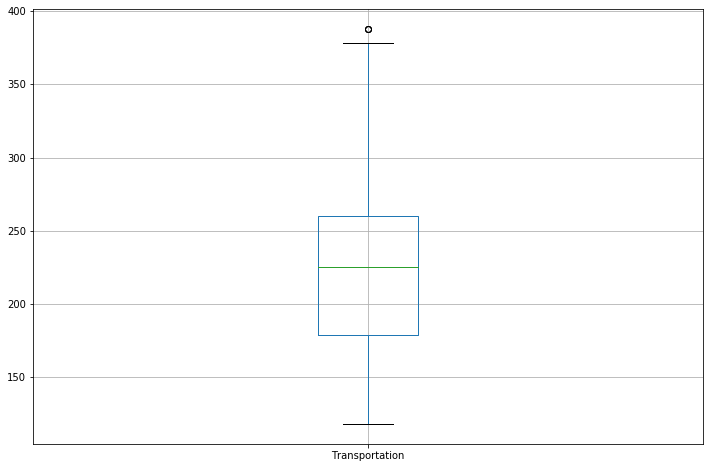

In [15]:
data.boxplot(column=['Transportation'], figsize=(12, 8))

Some notes about boxplots:

- The line at the center of the boxplot represents the median of the data
- The bottom and top edges of the box represent the first quartile (25 percentile) and third quartile (75 percentile) respectively
- The height of teh box represents the IQR (interquartile range= Q3-Q1)
- There are two lines extending outwards from the box, and these vertical lines end in vertical lines called whiskers
    * The top whisker represents $Q3 + 1.5*IQR$
    * The bottom whisker represents $Q1 - 1.5*IQR$
    * Whiskers serve as a measure for where most of your data points lie
- Data points that lie ouside of the whiskers are represented as dots- these dots are our outliers

Because of these features boxplots are very useful in quickly determining if our data has any outliers

You can also compare features by plotting them side by side

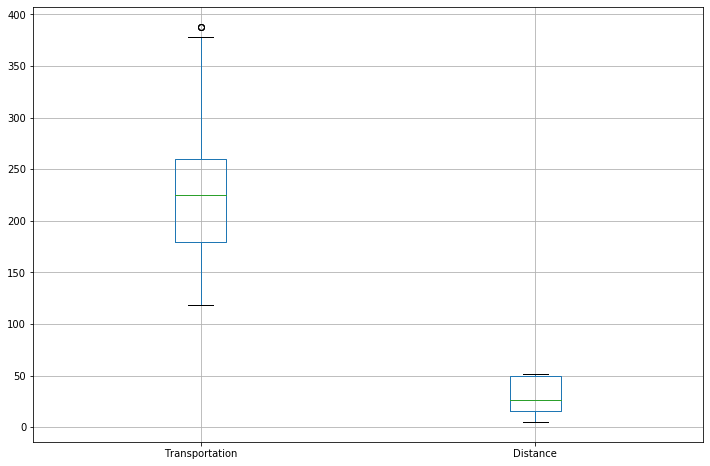

In [16]:
data.boxplot(column=['Transportation', 'Distance'], figsize=(12, 8))

However, as you can see there seems to be an issue when we plotted these two features side by side since the range of values for these features are drastically different. In addition their mean, standard deviation, and median are very different. This difference makes it harder to compare features

When we add a third feature we notice this issue becomes more prevelant the more differences there are among features, this results in a not so great way to compare features. For this reason, we need to standardize our data.

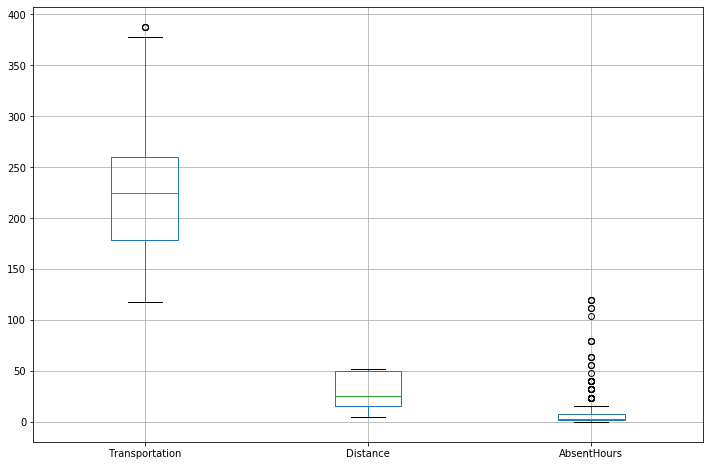

In [17]:
data.boxplot(column=['Transportation', 'Distance', 'AbsentHours'], figsize=(12, 8))

As you can see, this is not a good way to compare our data. Additionally, this is not a good way to feed data into our Ml algorithm. ML Algorithms typically do not work well with data that is on different scales and different standard deviations. Lets create another dataframe with scalled values for data.

In [18]:
scaled_data = pd.DataFrame()

Here we manually scale the data by applying this formula:  

x_scaled $ = (x - mean(x))/stdev(x) $

First we center the data at 0 mean by subtracting the mean from every datapoint and then dividing by the standard deviation so that the data has unit stdev or unit variance. 

Notice that standardization only uses values of the feature itself 

In [19]:
scaled_data['Transportation'] = (data['Transportation'] - np.mean(data['Transportation'].values)) / \
            np.std(data['Transportation'].values)

scaled_data['Distance'] = (data['Distance'] - np.mean(data['Distance'].values)) / \
            np.std(data['Distance'].values)

scaled_data['AbsentHours'] = (data['AbsentHours'] - np.mean(data['AbsentHours'].values)) / \
            np.std(data['AbsentHours'].values)

Nowe we can easily determine which values are above (positive) and below (negative) the mean 

In [20]:
scaled_data.head()

,Transportation,Distance,AbsentHours
0,1.011408,0.429556,-0.219511
1,-1.544379,-1.121694,-0.519767
2,-0.632665,1.441240,-0.369639
3,0.861947,-1.661258,-0.219511
4,1.011408,0.429556,-0.369639


In [21]:
scaled_data.describe()

,Transportation,Distance,AbsentHours
count,7.400000e+02,7.400000e+02,7.400000e+02
mean,6.601326e-17,-5.911187e-17,9.751959e-17
std,1.000676e+00,1.000676e+00,1.000676e+00
min,-1.544379e+00,-1.661258e+00,-5.197666e-01
25%,-6.326655e-01,-9.193567e-01,-3.696389e-01
50%,5.485632e-02,-2.449005e-01,-2.945750e-01
75%,5.779707e-01,1.373794e+00,8.074438e-02
max,2.491075e+00,1.508686e+00,8.487898e+00


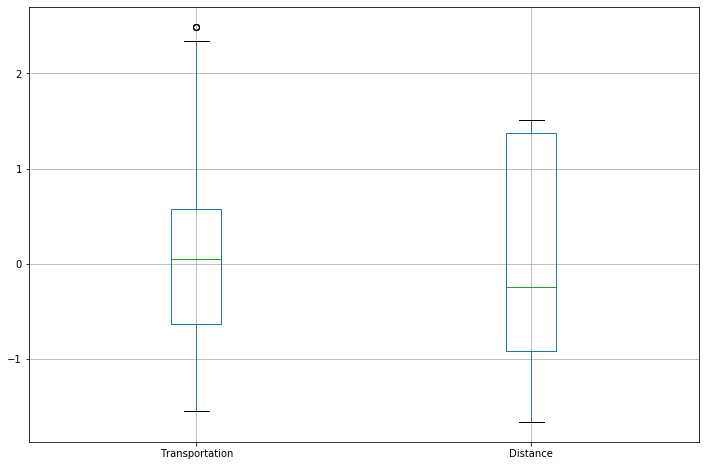

In [22]:
scaled_data.boxplot(column=['Transportation', 'Distance'], figsize=(12, 8))

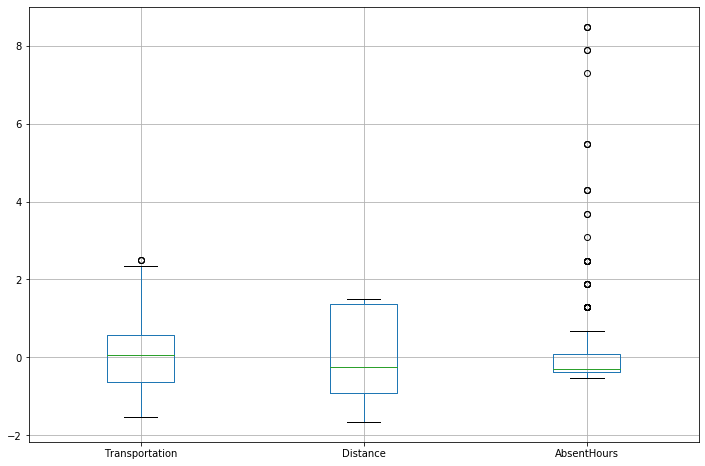

In [23]:
scaled_data.boxplot(figsize=(12, 8))

In [24]:
data.to_csv('Datasets/absenteeism_processed.csv', index=False)

In [25]:
!ls Datasets

Absenteeism_at_work.csv   data_1024.csv             student_performance.csv
Analyst_Forecasts.csv     diet_data.csv
absenteeism_processed.csv store_visits.csv
